In [13]:
# importação de arquivo
import pandas as pd
import numpy as np
# visualização de gráficos
import seaborn as sns
# visualização de gráficos
import matplotlib.pyplot as plt
# visualizar grafico dinâmico 
import plotly.express as px
# GaussianNB - Nome de uma distirbuição estatistica (usado para problemas genericos
from sklearn.tree import DecisionTreeClassifier
import pickle

In [5]:
with open('./../base/risco_credito.pkl', 'rb') as f:
    X_risco_credito, y_risco_credito = pickle.load(f)

In [7]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [8]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [9]:
tree_risco_credito = DecisionTreeClassifier(criterion='entropy')
tree_risco_credito.fit(X_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [10]:
# Importancia de cada atributo
# Perceba que dívida tem uma importancia maior
tree_risco_credito.feature_importances_

array([0.48015651, 0.06408636, 0.03885431, 0.41690281])

In [22]:
tree_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

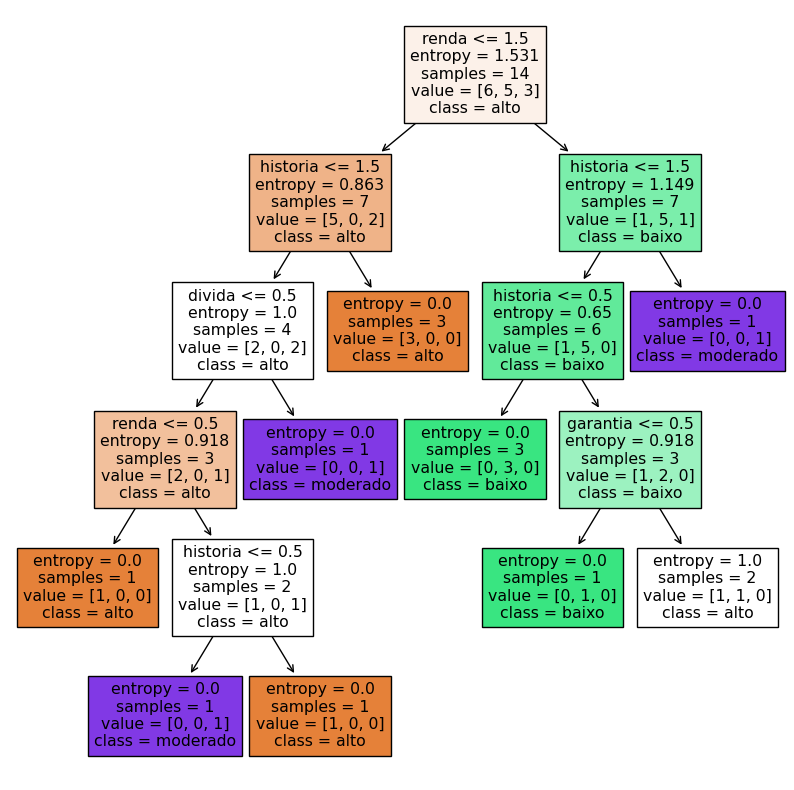

In [19]:
# visualizar a arvore de decisao
from sklearn import tree
previsores = ['historia', 'divida', 'garantia', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

tree.plot_tree(tree_risco_credito, feature_names=previsores, class_names=tree_risco_credito.classes_, filled=True);

In [21]:
# historia boa, divida alta, garantias nenhuma, renda > 35
# historiar ruim, dívida alta, garantias adequada, renda < 15
# tem na
previsoes = tree_risco_credito.predict([[0,0,1,2],[2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)